In [486]:
import pandas as pd
import arff
import matplotlib.pyplot as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [311]:
data = arff.load(open('weather.numeric.arff'))
cols = [col[0] for col in data['attributes']]
weather_DF = pd.DataFrame(data['data'], columns=cols)

In [312]:
weather_DF

,outlook,temperature,humidity,windy,play
0,sunny,85,85,FALSE,no
1,sunny,80,90,TRUE,no
2,overcast,83,86,FALSE,yes
3,rainy,70,96,FALSE,yes
4,rainy,68,80,FALSE,yes
5,rainy,65,70,TRUE,no
6,overcast,64,65,TRUE,yes
7,sunny,72,95,FALSE,no
8,sunny,69,70,FALSE,yes
9,rainy,75,80,FALSE,yes


In [313]:
mean_temp = weather_DF['temperature'].mean()
mean_humi = weather_DF['humidity'].mean()
print ("mean temprature is", mean_temp)
print ("mean humidity is", mean_humi)

('mean temprature is', 73.57142857142857)
('mean humidity is', 81.64285714285714)


In [314]:
weather_DF.ix[weather_DF['temperature']>mean_temp][['outlook','play']]

,outlook,play
0,sunny,no
1,sunny,no
2,overcast,yes
9,rainy,yes
10,sunny,yes
12,overcast,yes


In [315]:
weather_DF.ix[weather_DF['humidity']>mean_humi][['outlook','play']]

,outlook,play
0,sunny,no
1,sunny,no
2,overcast,yes
3,rainy,yes
7,sunny,no
11,overcast,yes
13,rainy,no


In [316]:
weather_DF['temperature_celsius']=(weather_DF['temperature']-32)*(5./9)
weather_DF

,outlook,temperature,humidity,windy,play,temperature_celsius
0,sunny,85,85,FALSE,no,29.444444
1,sunny,80,90,TRUE,no,26.666667
2,overcast,83,86,FALSE,yes,28.333333
3,rainy,70,96,FALSE,yes,21.111111
4,rainy,68,80,FALSE,yes,20.000000
5,rainy,65,70,TRUE,no,18.333333
6,overcast,64,65,TRUE,yes,17.777778
7,sunny,72,95,FALSE,no,22.222222
8,sunny,69,70,FALSE,yes,20.555556
9,rainy,75,80,FALSE,yes,23.888889


In [317]:
print ('playing tennis', weather_DF.ix[weather_DF['play']=='yes']['play'].count(), "out of", weather_DF.shape[0], "days")

('playing tennis', 9, 'out of', 14, 'days')


In [318]:
print ('playing tennis', weather_DF.ix[weather_DF['outlook']=='sunny'].ix[weather_DF['play']=='yes']['play'].count(), "out of", weather_DF.shape[0], "days, when it is sunny")

('playing tennis', 2, 'out of', 14, 'days, when it is sunny')


In [319]:
weather_DF.ix[weather_DF['play']=='yes']['temperature'].describe()[['mean','min','max']]

mean    73
min     64
max     83
Name: temperature, dtype: float64

In [320]:
weather_DF.ix[weather_DF['play']=='yes']['humidity'].describe()[['mean','min','max']]

mean    79.111111
min     65.000000
max     96.000000
Name: humidity, dtype: float64

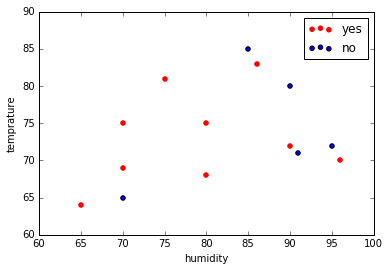

In [321]:
plt.scatter(weather_DF.ix[weather_DF['play']=='yes']['humidity'],weather_DF.ix[weather_DF['play']=='yes']['temperature'], label='yes', color='r')
plt.scatter(weather_DF.ix[weather_DF['play']=='no']['humidity'],weather_DF.ix[weather_DF['play']=='no']['temperature'],label='no')
plt.legend()
plt.xlabel('humidity')
plt.ylabel('temprature')

need to remove the explanation part of each file

space at the end of the file

space in the second line

attaching all files

each file has different formats

st5060ts.txt has mixed months and year format and also has two columns for 1950 (we use averaging)

integers had , to seperate the numbers: used .str.replace(',', '')

date formats were different across files

There were duplicate data (years) after 1960

In [586]:
import os
data_Df=pd.DataFrame()
data_Df['region']={}
for fn in os.listdir('/Users/phesami/Documents/DSE/phesami/DSE220/Data/'):
    file_path='/Users/phesami/Documents/DSE/phesami/DSE220/Data/'+fn
    if fn.endswith('9ts.txt'):
        !cat {file_path} | sed -e '1,/The figures/d'>temp.txt
        temp_DF=pd.read_fwf('temp.txt', header=1).dropna(axis=0, thresh=11).rename(columns={'Unnamed: 0': 'region'})
        temp_DF=temp_DF.replace(to_replace=',', value='', regex=True).convert_objects(convert_numeric=True)
        temp_DF['region']=temp_DF['region'].str.replace('.','').str.upper()
        data_Df=pd.merge(data_Df,temp_DF, how='outer', on='region')
    elif fn.endswith('60ts.txt'):
        !cat {file_path} | sed -e '1,/estimates\./d'>temp.txt
        temp_DF=pd.read_fwf('temp.txt', header=4).dropna(axis=0, thresh=11).rename(columns={'(census).1': '1960','Unnamed: 0': 'region'})
        temp_DF=temp_DF.replace(to_replace=',', value='', regex=True).convert_objects(convert_numeric=True)
        temp_DF['region']=temp_DF['region'].str.replace('.','').str.upper()
        temp_DF['1950']=(temp_DF['1950']+temp_DF['(census)'])/2
        temp_DF.drop(['(census)','1960'], axis=1, inplace=True)
        data_Df=pd.merge(data_Df,temp_DF, how='outer', on='region')
    elif fn.endswith('70ts.txt'):
        !cat {file_path} | sed -e '1,/To obtain/d'>temp.txt
        temp_DF=pd.read_fwf('temp.txt', header=4).dropna(axis=0, thresh=11).rename(columns={'(census).1': '1960','Unnamed: 0': 'region'})
        temp_DF=temp_DF.replace(to_replace=',', value='', regex=True).convert_objects(convert_numeric=True)
        temp_DF['region']=temp_DF['region'].str.replace('.','').str.upper()
        temp_DF['1960']=(temp_DF['1960']+temp_DF['1960.1'])/2
        temp_DF.drop(['1960.1','1970'], axis=1, inplace=True)
        data_Df=pd.merge(data_Df,temp_DF, how='outer', on='region')
    elif fn.endswith('80ts.txt'):
        !cat {file_path} | sed -e '1,/remaining/d'>temp.txt
        temp_DF=pd.read_fwf('temp.txt', header=1).dropna(axis=0, thresh=11)
        temp_DF.drop('Fip', axis=1, inplace=True)
        temp_DF.columns=range(1969,1981)
        temp_DF=temp_DF.rename(columns={1969: 'region'}).convert_objects(convert_numeric=True)
        temp_DF['region']=temp_DF['region'].str.replace('.','').str.upper()
        temp_DF.drop([1980], axis=1, inplace=True)
        data_Df=pd.merge(data_Df,temp_DF, how='outer', on='region')
    elif fn.endswith('90ts.txt'):
        !cat {file_path} | sed -e '1,/Table/d'>temp.txt
        temp_DF=pd.read_fwf('temp.txt', header=1).dropna(axis=0, thresh=11)
        temp_DF.columns=range(1979,1991)
        temp_DF=temp_DF.rename(columns={1979: 'region'}).convert_objects(convert_numeric=True)
        temp_DF['region']=temp_DF['region'].str.replace('.','').str.upper()
        data_Df=pd.merge(data_Df,temp_DF, how='outer', on='region')

##changing the columns to numeric values that can be used later for plotting##
data_Df.columns=range(1899,1991)
data_Df=data_Df.rename(columns={1899: 'region'})
data_Df.head()

,region,1900,1901,1902,1903,1904,1905,1906,1907,1908,...,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990
0,US,76094,77585,79160,80632,82165,83820,5437,87000,88709,...,229465714,231664458,233791994,235824902,237923795,240132887,242288918,244498982,246819230,248709873
1,NORTHEAST,21059,21401,21815,22248,22716,23214,3769,24320,24879,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NORTH CENTRAL,26359,26722,27126,27446,27830,28203,8524,28868,29187,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,SOUTH,24565,25114,25599,26055,26492,27003,7475,27879,28406,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,WEST,4112,4351,4620,4882,5127,5398,5671,5934,6234,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


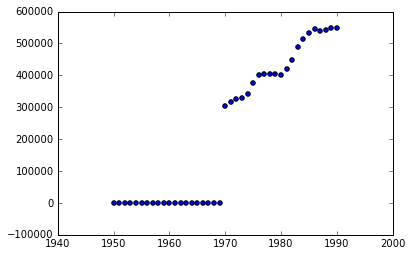

In [536]:
plt.scatter(data_Df.ix[data_Df['region']=='AK'].ix[:,1:].columns,data_Df.ix[data_Df['region']=='AK'].ix[:,1:])

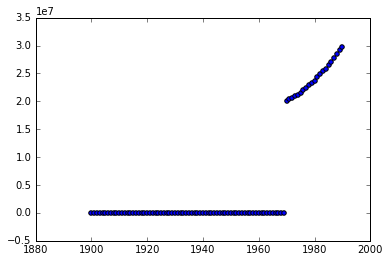

In [538]:
plt.scatter(data_Df.ix[data_Df['region']=='CA'].ix[:,1:].columns,data_Df.ix[data_Df['region']=='CA'].ix[:,1:])

AK, Colorado, Louisiana, Montana, New Mexico, North Dakota, Oklahoma, South Dakota, Texas, Utah, Wyoming.

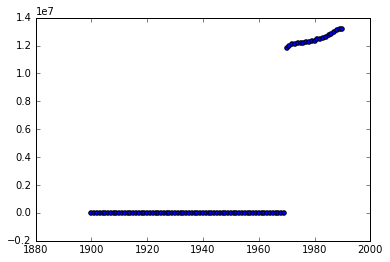

In [584]:
data_df_NewEngland=pd.DataFrame()
for st in ['ME', 'VT', 'NH', 'MA', 'RI', 'CT']:
    data_df_NewEngland=data_df_NewEngland.add(data_Df.ix[data_Df['region']==st].ix[:,1:],fill_value=0)
plt.scatter(data_df_NewEngland.sum(axis=0).keys(),data_df_NewEngland.sum(axis=0))

What state showed the greatest change in population?

1. greatest change in single year over year change
2. greatest change in average of year over year change
3. greatest change comparing 1990 to 1900

In [615]:
##problem 4
wine_Df=pd.read_csv('../Data/wine.data', names=['Alcohol','Malic acid','Ash','Alcalinity of ash','Magnesium',\
                                        'Total phenols','Flavanoids','Nonflavanoid phenols',\
                                        'Proanthocyanins','Color intensity','Hue',\
                                        'OD280/OD315 of diluted wines','Proline'])
wine_Df    

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.640000,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.380000,1.05,3.40,1050
1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.680000,1.03,3.17,1185
1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.800000,0.86,3.45,1480
1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.320000,1.04,2.93,735
1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.750000,1.05,2.85,1450
1,14.39,1.87,2.45,14.6,96,2.50,2.52,0.30,1.98,5.250000,1.02,3.58,1290
1,14.06,2.15,2.61,17.6,121,2.60,2.51,0.31,1.25,5.050000,1.06,3.58,1295
1,14.83,1.64,2.17,14.0,97,2.80,2.98,0.29,1.98,5.200000,1.08,2.85,1045
1,13.86,1.35,2.27,16.0,98,2.98,3.15,0.22,1.85,7.220000,1.01,3.55,1045
